In [5]:
%matplotlib inline

import numpy as np
from numpy import pi
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
import matplotlib.pyplot as plt

newparams = {'figure.figsize': (6.0, 6.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

**Interpolation problem.**

Given $n+1$ points $(x_i,y_i)_{i=0}^n$. Find a polynomial $p(x)$ of
lowest possible degree satisfying the *interpolation condition*

<!-- Equation labels as ordinary links -->
<div id="eq:intcond"></div>

$$
\begin{equation}
    \label{eq:intcond} \tag{1}
    p(x_i) = y_i,\qquad i=0,\dotsc, n.
\end{equation}
$$

The solution $p(x)$ is called the *interpolation polynomial*, the $x_i$ values
are called *nodes*, and the points $(x_i,y_i)$ *interpolation points*.

**Example 1:**
Given the points

$$
\begin{array}{c|c|c|c}
x_i & 0 & 2/3 & 1 \\ \hline
y_i & 1 & 1/2 & 0
\end{array}.
$$

The corresponding interpolation polynomial is

$$
p_2(x)=(-3x^2-x+4)/4
$$

The $y$-values of this example are chosen such that $y_i=\cos{(\pi x_i/2)}$.  So
$p_2(x)$ can be considered as an approximation to $\cos{(\pi x/2)}$ on the interval
$[0,1]$.

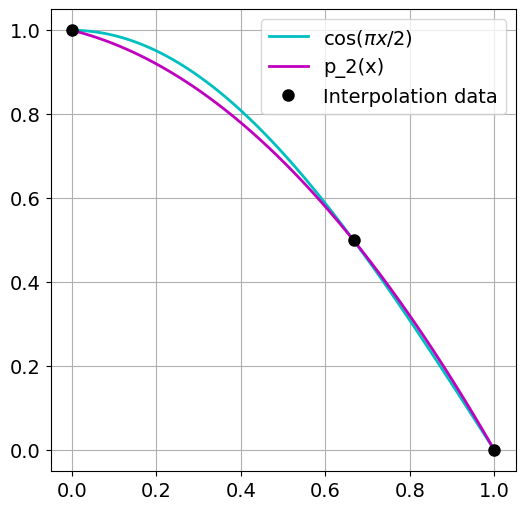

In [6]:
# Interpolation data
xdata = [0,2/3., 1]
ydata = [1, 1/2., 0]
# Interpolation polynomial
p2 = lambda x : (-3*x**2 -x + 4)/4.

# Grid points for plotting
x = np.linspace(0,1,100)
y = p2(x)

# Original function
f = np.cos(pi*x/2)

plt.plot(x,f, 'c',x,y,'m', xdata, ydata, "ok")
plt.legend(['$\cos(\pi x/2)$', 'p_2(x)', 'Interpolation data'])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

## Lagrange interpolation
Given $n+1$ points  $(x_i,y_i)_{i=0}^n$ with distinct $x_i$ values.
The *cardinal functions* are defined by:

$$
\ell_i(x) = \prod_{j=0,j\not=i}^n \frac{x-x_j}{x_i-x_j}
  = \frac{x-x_0}{x_i-x_0} \dotsm \frac{x-x_{i-1}}{x_i-x_{i-1}}\cdot \frac{x-x_{i+1}}{x_i-x_{i+1}} \dotsm \frac{x-x_n}{x_i-x_n} , \qquad i=0,\dotsc,n.
$$

The Lagrange basis functions have the following properties:
* $\ell_i \in \mathbb{P}_n$, $i=0,1,\dotsc,n$.

* $\ell_i(x_j) = \delta_{ij} = \begin{cases} 1, & \text{when } i=j \\ 0, & \text{when }i\not=j \end{cases}$.

* They are constructed solely from the nodes $x_i$'s.

* They are linearly independent, and thus form a basis for $\mathbb{P}_{n}$.

**Remark.** The Lagrange basis  functions are also often called  **Lagrange polynomials**.

The interpolation polynomial is now given by

$$
p_n(x) = \sum_{i=0}^n y_i \ell_i(x)
$$

since

$$
p_n(x_j) = \sum_{i=0}^n y_i \ell_i(x_j) = y_j, \qquad j=0,\dotsc,n.
$$

**Example 2:**
Given the points:

$$
\begin{array}{c|ccc}
x_i & 0 & 1 & 3 \\ \hline y_i & 3 & 8 & 6
\end{array}.
$$

The corresponding cardinal functions are given by:

$$
\begin{align*}
  \ell_0(x) & = \frac{(x-1)(x-3)}{(0-1)(0-3)}
           = \frac{1}{3}x^2-\frac{4}{3}x+1 \\
  \ell_1(x) & = \frac{(x-0)(x-3)}{(1-0)(1-3)}
           = -\frac12 x^2 + \frac32 x \\
  \ell_2(x) &= \frac{(x-0)(x-1)}{(3-0)(3-1)} = \frac16 x^2-\frac16 x
\end{align*}
$$

and the interpolation polynomial is given by (check it yourself):

$$
p_2(x) = 3 \ell_0(x) + 8 \ell_1(x) + 6 \ell_2(x) = -2x^2 + 7x + 3.
$$

In [8]:
def lagrangebasis(xdata, x):
    """
    lagrangebasis(xdata, x):
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x.
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list
    return l

def lagrangepoly(ydata, l):
    """
    lagrangepoly(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by cardinal(xdata, x)
    Return: An array with the interpolation polynomial.
    """
    poly = 0
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]
    return poly

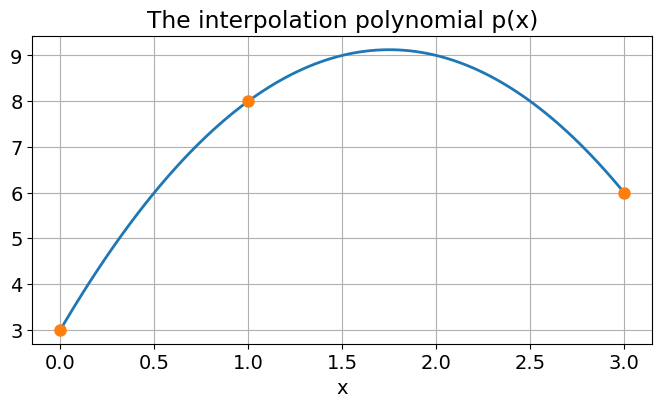

In [9]:
xdata = [0, 1, 3]           # The interpolation points
ydata = [3, 8, 6]
x = np.linspace(0, 3, 101)     # The x-values in which the polynomial is evaluated
l = lagrangebasis(xdata, x)      # Find the cardinal functions evaluated in x
p = lagrangepoly(ydata, l)      # Compute the polynomial evaluated in x
plt.plot(x, p)                  # Plot the polynomial
plt.plot(xdata, ydata, 'o')     # Plot the interpolation points
plt.title('The interpolation polynomial p(x)')
plt.xlabel('x');

<!-- --- begin exercise --- -->

## Exercise 2: (Submit with modified codes)

Construct the Lagrange interpolation polynomial  to interpolate the function $f(x) = \tan x$ at sample points  
$t_0 =0 $ $t_1 =\frac{ \pi}{3} $. What is the degree of the interpolating polynomial.Use the codes given above to draw the function and the interpolating polynomial in the given interval.


The degree of the interpolating polynomial = 1


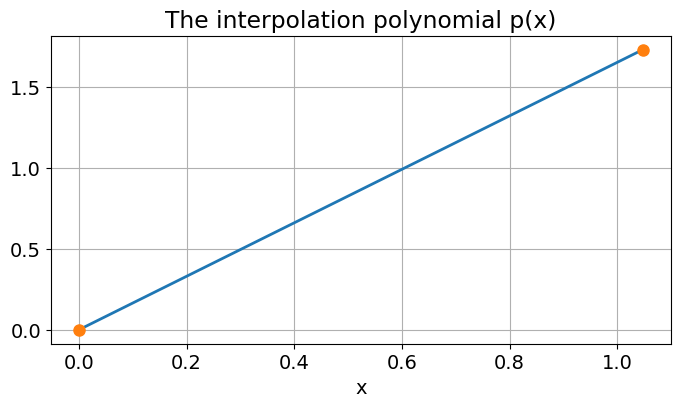

In [10]:
#Answer for Exercise 2

xdata = [0,np.pi/3]           # The interpolation points
ydata = [0,np.sqrt(3)]
x = np.linspace(0,np.pi/3, 101)     # The x-values in which the polynomial is evaluated
l = lagrangebasis(xdata, x)      # Find the cardinal functions evaluated in x
p = lagrangepoly(ydata, l)      # Compute the polynomial evaluated in x
plt.plot(x, p)                  # Plot the polynomial
plt.plot(xdata, ydata, 'o')     # Plot the interpolation points
plt.title('The interpolation polynomial p(x)')
plt.xlabel('x');

print('The degree of the interpolating polynomial =', len(xdata)-1)


## Exersice 3 :(Submit with modified codes)


Construct the Lagrange interpolation polynomial  to interpolate the function $f(x) = \tan x$ at sample points  
$t_0 =0 $ $t_1 =\frac{ \pi}{6} $ $t_2 =\frac{ \pi}{3} $. What is the degree of the interpolating polynomial.Use the codes given above to draw the function and the interpolating polynomial in the given interval.

The degree of the interpolating polynomial = 2


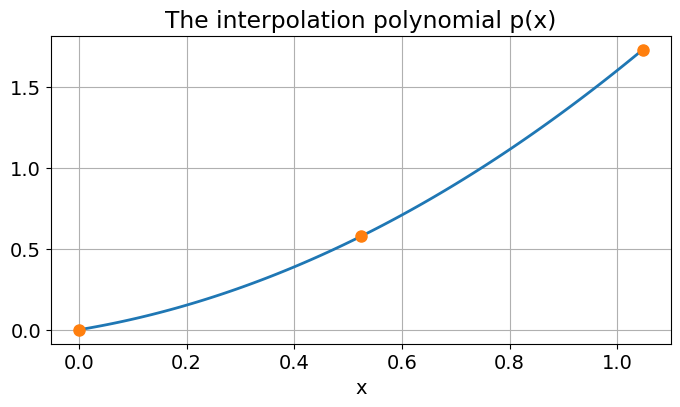

In [11]:
#Answer for Exercise 3

xdata = [0,np.pi/6,np.pi/3]           # The interpolation points
ydata = [0,1/np.sqrt(3),np.sqrt(3)]
x = np.linspace(0,np.pi/3, 101)     # The x-values in which the polynomial is evaluated
l = lagrangebasis(xdata, x)      # Find the cardinal functions evaluated in x
p = lagrangepoly(ydata, l)      # Compute the polynomial evaluated in x
plt.plot(x, p)                  # Plot the polynomial
plt.plot(xdata, ydata, 'o')     # Plot the interpolation points
plt.title('The interpolation polynomial p(x)')
plt.xlabel('x');

print('The degree of the interpolating polynomial =', len(xdata)-1)

# ERROR ANALYSIS
Given some function $f\in C[a,b]$. Choose $n+1$ distinct nodes in
$[a,b]$ and let $p_n(x) \in \mathbb{P}_n$ satisfy the interpolation
condition

$$
p_n(x_i) = f(x_i), \qquad i=0,\dots,n.
$$

What can be said about the error $e(x)=f(x)-p_n(x)$?

## Example 1: Computed error for interpolation of $\sin x$

<div id="interpolation:ex:example_sin_interpolation"></div>
Let $f(x)=\sin(x)$, $x\in [0,2\pi]$. Choose $n+1$ equidistributed
nodes, that is $x_i=ih$, $i=0,\dots,n$, and $h=2\pi/n$. Calculate the
interpolation polynomial by use of the functions `lagrangebasis` and
`lagrangepoly`. Plot the error $e_n(x)=f(x)-p_n(x)$ for different values
of $n$. Choose $n=4,8,16$ and $32$.  Notice how the error is
distributed over the interval, and find the maximum error
$\max_{x\in[a,b]}|e_n(x)|$ for each $n$.

In [12]:
# Define the function
def f(x):
    return np.sin(x)

# Set the interval
a, b = 0, 2*np.pi                  # The interpolation interval
x = np.linspace(a, b, 101)         # The 'x-axis'

# Set the interpolation points
n = 4                         # Interpolation points
xdata = np.linspace(a, b, n+1)     # Equidistributed nodes (can be changed)
ydata = f(xdata)

# Evaluate the interpolation polynomial in the x-values
l = lagrangebasis(xdata, x)
p = lagrangepoly(ydata, l)

Max error is 1.81e-01


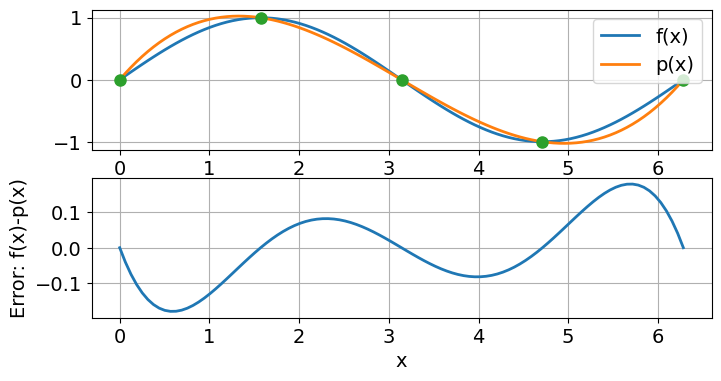

In [13]:
# Plot f(x) og p(x) and the interpolation points
plt.subplot(2,1,1)
plt.plot(x, f(x), x, p, xdata, ydata, 'o')
plt.legend(['f(x)','p(x)'])
plt.grid(True)

# Plot the interpolation error
plt.subplot(2,1,2)
plt.plot(x, (f(x)-p))
plt.xlabel('x')
plt.ylabel('Error: f(x)-p(x)')
plt.grid(True)
print("Max error is {:.2e}".format(max(abs(p-f(x)))))

<!-- --- begin exercise --- -->

## Exercise 4: Interpolation of $\tfrac{1}{1+25 x^2}$ (Submit with modified codes)

Repeat the previous experiment with Runge's function

$$
f(x) = \frac{1}{1+25x^2}, \qquad x\in [-5,5].
$$

Max error is 8.29e-01


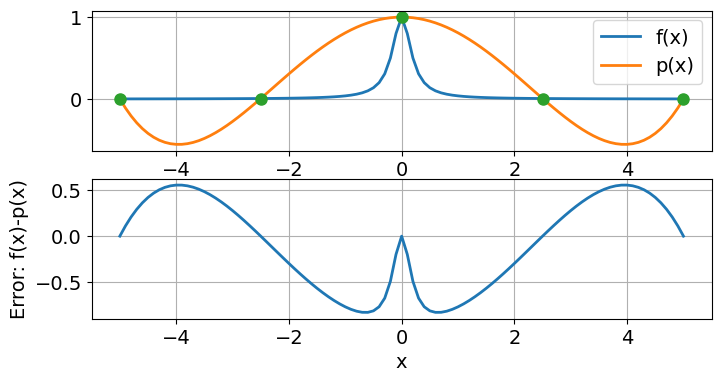

In [18]:
#Answer for Exercise 4

# Define the function
def f(x):
    return 1/(1+25*x**2)

# Set the interval
a, b = -5,5                  # The interpolation interval
x = np.linspace(a, b, 101)         # The 'x-axis'

# Set the interpolation points
n = 4                         # Interpolation points
xdata = np.linspace(a, b, n+1)     # Equidistributed nodes (can be changed)
ydata = f(xdata)

# Evaluate the interpolation polynomial in the x-values
l = lagrangebasis(xdata, x)
p = lagrangepoly(ydata, l)

# Plot f(x), p(x) and the interpolation points
plt.subplot(2,1,1)
plt.plot(x, f(x), x, p, xdata, ydata, 'o')
plt.legend(['f(x)','p(x)'])
plt.grid(True)

# Plot the interpolation error
plt.subplot(2,1,2)
plt.plot(x, (f(x)-p))
plt.xlabel('x')
plt.ylabel('Error: f(x)-p(x)')
plt.grid(True)
print("Max error is {:.2e}".format(max(abs(p-f(x)))))

<!-- --- begin exercise --- -->

## Exercise 2: Estimated Interpolation error for $\sin(x)$ (Submit with values of computed upper bounds and estimated upper bounds for given n)

Let again $f(x)=\sin(x)$ and $p_n(x)$ the polynomial interpolating $f(x)$ in
$n+1$ equidistributed points on $[0,2\pi]$.
An upper bound for the error for different values of $n$
can be found easily. Clearly,
$\max_{x\in[0,2\pi]}|f^{(n+1)}(x)|=M=1$ for all $n$, so

$$
|e_n(x)| = |f(x)-p_n(x)| \leq
\frac{1}{4(n+1)}\left(\frac{2\pi}{n}\right)^{n+1}, \qquad x\in[a,b].
$$

Use the code in the first Example of this lecture to verify the result
for $n = 2, 4, 8, 16$. How close is the bound to the real error?

In [27]:
#Answer for Exercise 2

def f(x):
 return np.sin(x)

    # Set the interval
a, b = 0, 2*pi                  # The interpolation interval
x = np.linspace(a, b, 101)         # The 'x-axis'

for n in [2,4, 8, 16]:
          # Set the interpolation points
                           # Interpolation points
  xdata = np.linspace(a, b, n+1)     # Equidistributed nodes (can be changed)
  ydata = f(xdata)

  # Evaluate the interpolation polynomial in the x-values
  l = lagrangebasis(xdata, x)
  p = lagrangepoly(ydata, l)
  print("n =",n)
  print("Computed max error is {:.2e}".format(max(abs(p-f(x)))))
  err_est = 1/(4*(n+1))*(2*pi/n)**(n+1)
  print("Estimated max error is {:.2e}".format(err_est))
  print()
  # end of example_est_error_interpolation()

n = 2
Computed max error is 1.00e+00
Estimated max error is 2.58e+00

n = 4
Computed max error is 1.81e-01
Estimated max error is 4.78e-01

n = 8
Computed max error is 1.20e-03
Estimated max error is 3.16e-03

n = 16
Computed max error is 6.45e-10
Estimated max error is 1.85e-09

